In [138]:
import pandas as pd

df = pd.read_csv('BTC_data_preprocessed.csv', index_col = 0)
df

,Close,Open,High,Low,Vol,Change
Date,,,,,,
2018-09-13,6482.9,6338.0,6867.3,6337.8,3530000.0,2.29
2018-09-14,6483.7,6482.9,6579.4,6412.1,3200000.0,0.01
2018-09-15,6519.0,6482.6,6562.9,6470.3,3160000.0,0.54
2018-09-16,6500.2,6519.0,6520.8,6406.2,3340000.0,-0.29
2018-09-17,6251.9,6500.2,6533.5,6215.9,3260000.0,-3.82
...,...,...,...,...,...,...
2023-08-13,29300.1,29428.2,29468.5,29272.3,13490.0,-0.44
2023-08-14,29426.7,29300.1,29689.0,29116.0,39300.0,0.43
2023-08-15,29195.3,29426.7,29472.0,29118.6,33810.0,-0.79


In [139]:
df.index.dtype

dtype('O')

In [140]:
df.index = pd.to_datetime(df.index)

In [141]:
df.index.dtype

dtype('<M8[ns]')

In [142]:
df.sort_index(ascending=False, inplace=True)

**Conversion-Line**

In [143]:
df['Date'] = df.index
df.reset_index(drop=True, inplace=True)

In [144]:
df.columns

Index(['Close', 'Open', 'High', 'Low', 'Vol', 'Change', 'Date'], dtype='object')

In [145]:
df = df[['Date', 'Close', 'Open', 'High', 'Low', 'Vol', 'Change']]

In [146]:
df.head(3)

,Date,Close,Open,High,Low,Vol,Change
0,2023-08-17,28576.7,28726.1,28771.8,28381.0,53520.0,-0.52
1,2023-08-16,28726.3,29195.3,29251.1,28717.6,43710.0,-1.61
2,2023-08-15,29195.3,29426.7,29472.0,29118.6,33810.0,-0.79


In [147]:
df.dtypes

Date      datetime64[ns]
Close            float64
Open             float64
High             float64
Low              float64
Vol              float64
Change           float64
dtype: object

**Conversional Line**

The Tenkan-sen is calculated by taking the average of the highest high and the lowest low over a specified period of time. Typically, this period is set to 9 periods.


In [148]:
for i in range(len(df)-9):
    max_ = df.loc[i:i+9,'High'].max()
    min_ = df.loc[i:i+9,'Low'].min()
    conv = (max_ + min_) / 2
    df.loc[i, ['ConvLine']] = conv

**Base Line**

The Kijun-sen is calculated similarly to the Tenkan-sen, but over a longer period of time. It's the average of the highest high and the lowest low over a period of 26 periods.

In [149]:
for i in range(len(df)-26):
    max_ = df.loc[i:i+26,'High'].max()
    min_ = df.loc[i:i+26,'Low'].min()
    base = (max_ + min_) / 2
    df.loc[i, 'BaseLine'] = base

C:\Users\anerg\AppData\Local\Temp\ipykernel_27448\889309111.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i, 'BaseLine'] = base


**Span A**

The Senkou Span A is calculated by taking the average of the Tenkan-sen and the Kijun-sen and then shifting it forward by 26 periods. This line forms one edge of the Kumo (cloud).

In [150]:
for i in range(len(df)-26):
    base = df.loc[i+26, 'BaseLine']
    conv = df.loc[i+26, 'ConvLine']
    spanA = (base + conv) / 2
    df.loc[i, 'SpanA'] = spanA

C:\Users\anerg\AppData\Local\Temp\ipykernel_27448\2581474253.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i, 'SpanA'] = spanA


**Span B**

The Senkou Span B is calculated similarly to the Kijun-sen, but over an even longer period of time. It's the average of the highest high and the lowest low over a period of 52 periods, and then shifted forward by 26 periods to align with the Senkou Span A.

In [151]:
for i in range(len(df)-78):
    max_ = df.loc[i+26:i+78,'High'].max()
    min_ = df.loc[i+26:i+78,'Low'].min()
    spanB = (max_ + min_) / 2
    df.loc[i, 'SpanB'] = spanB

C:\Users\anerg\AppData\Local\Temp\ipykernel_27448\303720981.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i, 'SpanB'] = spanB


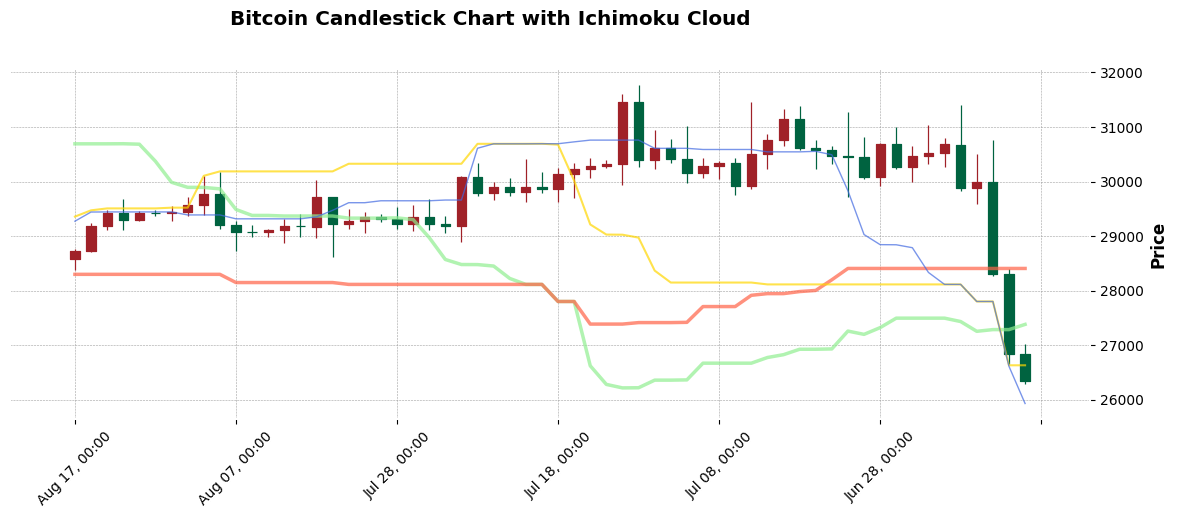

In [162]:
import mplfinance as mpf
df2 = df.set_index('Date')
df60days = df2.iloc[:60,:]

# Ichimoku bulut renkleri
def ichimoku_btc_chart_60days(fs1, fs2):
    cloud_color = mpf.make_marketcolors(up='g', down='r', inherit=True)

    # Ichimoku verileri
    ichimoku = [
        mpf.make_addplot(df60days['SpanA'], color='lightgreen',width=2.5, alpha=0.7),
        mpf.make_addplot(df60days['SpanB'], color='tomato',width=2.5, alpha=0.7),
        mpf.make_addplot(df60days['BaseLine'], color='gold', width=1.5, alpha=0.7),
        mpf.make_addplot(df60days['ConvLine'], color='royalblue', width=1, alpha=0.7)
    ]

    # Grafik çizimi
    mpf.plot(
        df60days, 
        type='candle', 
        addplot=ichimoku, 
        style='charles', 
        title='Bitcoin Candlestick Chart with Ichimoku Cloud', 
        ylabel='Price',
        figsize = (fs1,fs2)
    )
ichimoku_btc_chart_60days(15,5)

**Future Cloud**

In [153]:
for i in range(len(df)- 52):
    # SpanA
    base = df.loc[i, 'BaseLine']
    conv = df.loc[i, 'ConvLine']
    spanA = (base + conv) / 2

    # SpanB
    max_ = df.loc[i:i+52,'High'].max()
    min_ = df.loc[i:i+52,'Low'].min()
    spanB = (max_ + min_) / 2


    future_cloud = spanA - spanB
    df.loc[i, 'FutureCloud'] = future_cloud

C:\Users\anerg\AppData\Local\Temp\ipykernel_27448\3124682322.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i, 'FutureCloud'] = future_cloud


In [155]:
df.head(20)

,Date,Close,Open,High,Low,Vol,Change,ConvLine,BaseLine,SpanA,SpanB,FutureCloud
0,2023-08-17,28576.7,28726.1,28771.8,28381.0,53520.0,-0.52,29274.80,29359.00,30692.950,28301.25,-755.850
1,2023-08-16,28726.3,29195.3,29251.1,28717.6,43710.0,-1.61,29443.10,29474.00,30692.950,28301.25,-729.200
2,2023-08-15,29195.3,29426.7,29472.0,29118.6,33810.0,-0.79,29444.80,29509.50,30692.950,28301.25,-710.600
3,2023-08-14,29426.7,29300.1,29689.0,29116.0,39300.0,0.43,29444.80,29509.50,30694.550,28301.25,-710.600
4,2023-08-13,29300.1,29428.2,29468.5,29272.3,13490.0,-0.44,29444.80,29509.50,30686.000,28301.25,-710.600
5,2023-08-12,29428.2,29420.8,29480.8,29375.4,11070.0,0.02,29444.80,29509.50,30373.200,28301.25,-540.350
6,2023-08-11,29420.8,29448.9,29544.9,29271.2,27710.0,-0.10,29444.80,29523.00,29987.975,28301.25,268.900
7,2023-08-10,29449.0,29578.0,29719.4,29377.5,32000.0,-0.44,29389.80,29523.00,29895.375,28301.25,426.600
8,2023-08-09,29578.0,29771.3,30104.0,29384.2,49670.0,-0.67,29389.80,30106.80,29894.250,28301.25,720.750
9,2023-08-08,29777.4,29204.2,30168.6,29137.7,62570.0,1.96,29389.80,30187.75,29867.475,28301.25,814.775
